In [49]:
#Here you must specify your own path
root = ''

In [50]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder

In [51]:
# Dic to get the respective target values of the numbers.
target_dic = {
    0: '(0, 20]constant',
    1: '(20, 40]constant',
    2: '(40, 60]constant',
    3: '(60, 80]constant',
    4: '(80, 100]constant',
    5: '(0, 20]intermittent',
    6: '(20, 40]intermittent',
    7: '(40, 60]intermittent',
    8: '(60, 80]intermittent',
    9: '(80, 100]intermittent',
}

In [52]:
#Dic to get the class weight of the corresponding class. Computed in Data_split notebook
class_weights = {
    0: 0.35625,
    1: 1.05674157,
    2: 0.69409594,
    3: 0.74642857,
    4: 1.254,
    5: 0.9746114,
    6: 1.69459459,
    7: 1.881,
    8: 2.475,
    9: 8.55,
}

In [53]:
#read in csv file into dataframe
df_train = pd.read_csv(root + 'data/02_processed/completed_train.csv', sep=';')
df_train.pop('Unnamed: 0')

df2=df_train.copy()
df2.drop(['target','4','66'], axis = 1,inplace=True)


#read validation and test data from csv
df_validation = pd.read_csv(root + 'data/02_processed/completed_validation.csv', sep=';')
df_validation.set_index('user_id',inplace=True)
df_test = pd.read_csv(root + 'data/02_processed/completed_test.csv', sep=';')
df_test.set_index('user_id',inplace=True)

#encode target column of test data
target_test=pd.get_dummies(df_test['target'], prefix='target')

#encode target column of test data
target_train= df_train['target']

#delete target from training data
df_train.pop('target')

# target of train data without encoding
target_test= df_test['target']

#delete target from training data
df_test.pop('target')

train=df_train.copy()
test= df_test.copy()

In [54]:
#Get the categorical and numerical column names
categorical_columns=[]
numerical_columns=[]
for name, values in train.iteritems():
    if values.dtype==np.float64:
        numerical_columns.append(name)
    if values.dtype==object:
        categorical_columns.append(name)

 

In [55]:
#Encoder to encode categorical variables into integer
categorical_encoder = OrdinalEncoder()

#ColumnTransformer encodes categorical data with the categorical_encoder.
#and numeric columns are not edited.
preprocessing = ColumnTransformer(
    [('cat', categorical_encoder, categorical_columns),
     ('num', 'passthrough', numerical_columns)])


#Classifier
RF = RandomForestClassifier(
bootstrap= False,max_features= 2,
 max_leaf_nodes= 120,
 min_samples_leaf= 2,
 min_samples_split=7,
 n_estimators= 300,
random_state=0,
)

#Created Pipeline to combine preprocessing of the data and the classifier.
model = Pipeline([
    ('preprocess', preprocessing),
    ('classifier',RF)
])

model.fit(train, target_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['5', '8', '10', '11', '35',
                                                   '37', '40', '68', '70', '71',
                                                   '72', '74', '76', '78', '79',
                                                   '80', '83']),
                                                 ('num', 'passthrough',
                                                  ['4', '66', '67'])])),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, max_features=2,
                                        max_leaf_nodes=120, min_samples_leaf=2,
                                        min_samples_split=7, n_estimators=300,
                                        random_state=0))])

In [56]:
#Predictions of the model on the test data
predictions = model.predict(test)

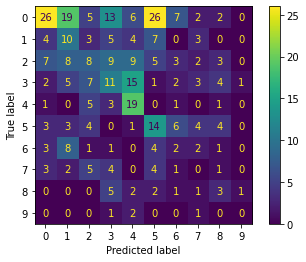

In [57]:
#A confusion matrix  of the predictions of the classifier to see how it performs in detail.
c = confusion_matrix(target_test,predictions)
cm = ConfusionMatrixDisplay(c).plot()


In [58]:
# F1-score measured on test data
f1_score(target_test,predictions,average='macro')

0.1914456830099865

In [59]:
arr = model.named_steps['classifier'].feature_importances_
arr

array([0.02876094, 0.04019326, 0.02629079, 0.05480865, 0.05909319,
       0.02482972, 0.04155797, 0.04675472, 0.04197165, 0.02548838,
       0.03545503, 0.02944332, 0.02600163, 0.05847532, 0.04010453,
       0.02650918, 0.02236832, 0.10518888, 0.14189379, 0.12481076])

In [60]:
#classification_report
target_names=['(0, 20]constant','(20, 40]constant','(40, 60]constant','(60, 80]constant','(80, 100]constant','(0, 20]intermittent','(20, 40]intermittent','(40, 60]intermittent','(60, 80]intermittent','(80, 100]intermittent',]
print(classification_report(target_test,predictions,digits=3,target_names=target_names,))

                       precision    recall  f1-score   support

      (0, 20]constant      0.531     0.245     0.335       106
     (20, 40]constant      0.182     0.278     0.220        36
     (40, 60]constant      0.211     0.148     0.174        54
     (60, 80]constant      0.212     0.216     0.214        51
    (80, 100]constant      0.328     0.633     0.432        30
  (0, 20]intermittent      0.222     0.359     0.275        39
 (20, 40]intermittent      0.087     0.091     0.089        22
 (40, 60]intermittent      0.000     0.000     0.000        20
 (60, 80]intermittent      0.158     0.200     0.176        15
(80, 100]intermittent      0.000     0.000     0.000         4

             accuracy                          0.247       377
            macro avg      0.193     0.217     0.191       377
         weighted avg      0.286     0.247     0.244       377

